## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

In [11]:
x = np.random.uniform(-3.0,3.0,size=100)

In [12]:
X = x.reshape(-1,1)

In [13]:
y = 0.5* x**2 +x + 2+np.random.normal(0,1,size=100)


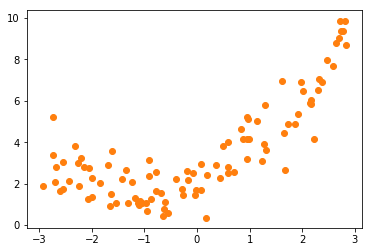

In [14]:
plt.scatter(x,y)
plt.show()

## 使用线性回归

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.56553680394984651

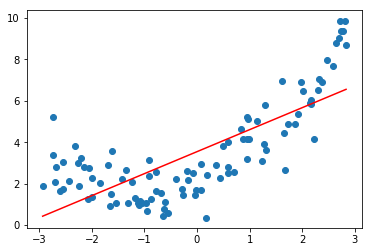

In [18]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color = 'r')
plt.show()

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y,y_predict)

0.56553680394984651

In [21]:
mean_squared_error(y,y_predict)

2.4820797451437002

## 使用多项回归

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [23]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [24]:
poly2_reg = PolynomialRegression(degree=2)

In [28]:
poly2_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [29]:
y2_predict = poly2_reg.predict(X)

In [30]:
mean_squared_error(y,y2_predict)

0.83504395481165605

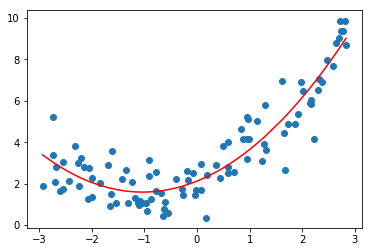

In [31]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color = 'r')
plt.show()

In [32]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [34]:
y10_predict=poly10_reg.predict(X)

In [35]:
mean_squared_error(y,y10_predict)

0.6968212004439891

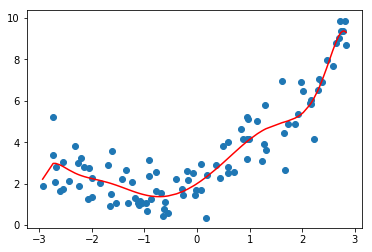

In [36]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [37]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.37512773151803813

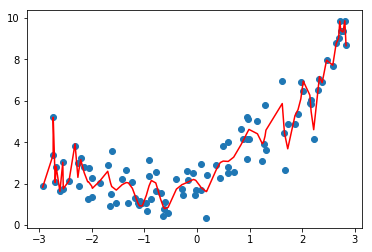

In [38]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [39]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

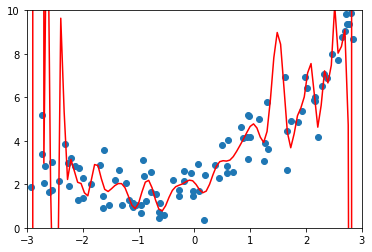

In [40]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

## train test split的意义

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [42]:
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2.7273796680202453

In [45]:
poly2_reg.fit(X_train,y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.93582080799257483

In [46]:
poly100_reg.fit(X_train,y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y100_predict)

10727116804.863045